In [1]:
import pandas
import seaborn

In [2]:
# for each gene find its regulators. find all regulators
# generate a dataframe with the binding sites



# 0. user-defined variables

In [3]:
dorothea_database = '/Users/adrian/databases/dorothea/database.txt'

In [4]:
targets = ['GRAMD1B', 'AREG', 'PDK4', 'PDE3A', 'CXCR4', 'NR4A3', 'RP3-428L16.2', 'NR4A2', 'STC1', 'DUSP4', 'FGF18', 'CTH', 'TNFSF15', 'IL11', 'DAW1', 'CHRNA9', 'GNAL', 'SLC7A2', 'LINC00313', 'CHMP1B', 'RP11-78A19.3', 'SOCS2', 'CLCF1', 'CREM', 'TFPI2', 'RNF152', 'DOCK8', 'RP11-130C6.1', 'CH507-42P11.5', 'RP11-324I22.3', 'ITGAX', 'DNAJB5-AS1', 'RP11-88H10.2', 'RP1-186E20.1', 'RP11-696D21.2', 'SLC19A2', 'SYF2P2', 'STARD13-IT1', 'RP11-325K4.2', 'DIO2', 'CGA', 'SH2D2A', 'THBD', 'RHCG', 'C11orf96', 'LINC00161', 'RASD1', 'FAM167A', 'KIFC1', 'RSPO3', 'TNFRSF1B', 'FGL2', 'DNASE1L3', 'FOSB', 'STAMBPL1', 'AGTR1', 'AKTIP', 'NPTX1', 'CASP9', 'SORBS1', 'ZCCHC12', 'IKZF2', 'PTHLH', 'GPRC5A', 'PIK3R3', 'KLF4', 'IL1B', 'ADAMTS4', 'CH507-42P11.8', 'TMEM100', 'PPP1R3C', 'ADAMTS1', 'SMOX', 'APOLD1', 'ABCG1', 'TGFA', 'HERPUD1', 'CCNH', 'RP11-638I2.6', 'NTRK1', 'RP11-265N7.2', 'IL12RB2', 'SULT1E1', 'HR', 'RP3-523E19.2', 'RP11-95P13.1', 'RRM2', 'SLC15A2', 'RP11-879F14.2', 'SCN3B', 'PDE4D', 'MYPN', 'SULT1B1', 'LRRC1', 'CFAP44-AS1', 'SHH', 'VIP', 'NOX4', 'PTGS2', 'TMEM87A', 'SLC16A6', 'SLC26A2', 'ALG13', 'AVPI1', 'ATG101', 'BMS1P17', 'RP4-687K1.2', 'TMPRSS11D', 'RP11-815J21.3', 'SELE', 'IRAK2', 'SNAI2', 'TRAC', 'KIAA1755', 'RP11-388P9.2', 'PGAM1P1', 'FOXS1', 'ART4', 'TLR2', 'IFIT2', 'TRAF1', 'TSPAN2', 'TNIP3', 'NPAS1', 'IL1A', 'E2F7', 'BMF', 'FRMD6', 'RP11-162P23.2', 'AC009133.15', 'FGF2', 'TRIM47', 'RRAD', 'KCTD4', 'PAPLN', 'GBP1', 'KIAA1211L', 'GADD45A', 'AC006116.27', 'XXcos-LUCA11.5', 'RHEBP2', 'RP11-463D19.2', 'ENPP7P8', 'SH3RF2', 'KSR2', 'BLZF2P', 'SGK223', 'TBC1D2', 'LIF', 'RYR3', 'DCLK2', 'RP11-24N18.1', 'CCL2', 'IFIH1']

# 1. read data

## 1.1. read database

In [5]:
db = pandas.read_csv(dorothea_database, sep='\t')
db.head()

,tf,confidence,target,mor
1,ADNP,D,ATF7IP,1
2,ADNP,D,DYRK1A,1
3,ADNP,D,TLK1,1
4,ADNP,D,ZMYM4,1
5,ADNP,D,ABCC1,1


In [6]:
confidence_db = db[(db['confidence'] == 'A') | (db['confidence'] == 'B') | (db['confidence'] == 'C')]
print(confidence_db)
confidence_db.tail(100)

            tf confidence   target  mor
1449       AHR          C   CYP1A1    1
1450       AHR          C   CYP1A2    1
1451       AHR          C   CYP1B1    1
1452       AHR          C      FOS    1
1453       AHR          C      MYC    1
...        ...        ...      ...  ...
426153  ZNF740          C   ZBTB7A    1
426154  ZNF740          C    ZFP91    1
426155  ZNF740          C  ZNF385A    1
426156  ZNF740          C  ZNF512B    1
426157  ZNF740          C   ZNF687    1

[13222 rows x 4 columns]


,tf,confidence,target,mor
360001,ZNF384,C,SEPTIN9,1
360002,ZNF384,C,SMAD7,1
360003,ZNF384,C,SORBS1,1
360004,ZNF384,C,SOX6,1
360005,ZNF384,C,SPEN,1
...,...,...,...,...
426153,ZNF740,C,ZBTB7A,1
426154,ZNF740,C,ZFP91,1
426155,ZNF740,C,ZNF385A,1
426156,ZNF740,C,ZNF512B,1


# 2. analysis

In [7]:
#targets=targets[:50]

In [8]:
# create a dictionary of TFs regulating targets
all_regulators = []
informative_targets = []
for target in targets:
    print('working with {}'.format(target))
    
    # select target data
    chunk = confidence_db[confidence_db['target'] == target]
    regulators = chunk['tf'].to_list()
    for element in regulators:
        all_regulators.append(element)
    print('{} regulators found'.format(len(regulators)))
    print()
    if len(regulators) > 1:
        informative_targets.append(target)
unique_regulators = list(set(all_regulators))
unique_regulators.sort()
print('unique regulators found: {}'.format(len(unique_regulators)))

working with GRAMD1B
2 regulators found

working with AREG
4 regulators found

working with PDK4
2 regulators found

working with PDE3A
1 regulators found

working with CXCR4
11 regulators found

working with NR4A3
2 regulators found

working with RP3-428L16.2
0 regulators found

working with NR4A2
3 regulators found

working with STC1
0 regulators found

working with DUSP4
2 regulators found

working with FGF18
1 regulators found

working with CTH
1 regulators found

working with TNFSF15
0 regulators found

working with IL11
1 regulators found

working with DAW1
0 regulators found

working with CHRNA9
0 regulators found

working with GNAL
1 regulators found

working with SLC7A2
0 regulators found

working with LINC00313
0 regulators found

working with CHMP1B
0 regulators found

working with RP11-78A19.3
0 regulators found

working with SOCS2
2 regulators found

working with CLCF1
0 regulators found

working with CREM
5 regulators found

working with TFPI2
5 regulators found

working 

## 2.2. build the matrix

In [9]:
influences = {}
for target in informative_targets:
    print('working with {}'.format(target))
    influences[target] = []
    for regulator in unique_regulators:
        #print('\t{}'.format(regulator))
        chunk = confidence_db[(confidence_db['target'] == target) & (confidence_db['tf'] == regulator)]
        if chunk.empty == True:
            influence = 0 
        else:
            if chunk['confidence'].item() == 'A':
                influence = 1
            elif chunk['confidence'].item() == 'B':
                influence = 0.8
            elif chunk['confidence'].item() == 'C':
                influence = 0.6
            #elif chunk['confidence'].item() == 'D':
            #    influence = 0.4
            #elif chunk['confidence'].item() == 'E':
            #    influence = 0.2
            #else:
            #    raise ValueError('unknown confidence coding')
        # add corresponding influence
        influences[target].append(influence)

# transform to pandas df
idf = pandas.DataFrame(influences)
idfr = idf.transpose()
idfr.columns = unique_regulators

print(idfr.shape)
idfr.head()

working with GRAMD1B
working with AREG
working with PDK4
working with CXCR4
working with NR4A3
working with NR4A2
working with DUSP4
working with SOCS2
working with CREM
working with TFPI2
working with ITGAX
working with DIO2
working with CGA
working with THBD
working with FGL2
working with AGTR1
working with CASP9
working with SORBS1
working with IKZF2
working with PTHLH
working with GPRC5A
working with KLF4
working with IL1B
working with SMOX
working with ABCG1
working with TGFA
working with HERPUD1
working with NTRK1
working with IL12RB2
working with PDE4D
working with VIP
working with PTGS2
working with SELE
working with SNAI2
working with TLR2
working with TRAF1
working with IL1A
working with FRMD6
working with FGF2
working with GADD45A
working with CCL2
(41, 104)


,AR,ATF1,ATF2,ATF3,ATF4,BACH2,CDX2,CEBPA,CEBPB,CEBPD,...,TP53,TP63,TP73,USF1,USF2,YY1,ZBTB7A,ZKSCAN1,ZNF263,ZNF384
GRAMD1B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AREG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PDK4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CXCR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
NR4A3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


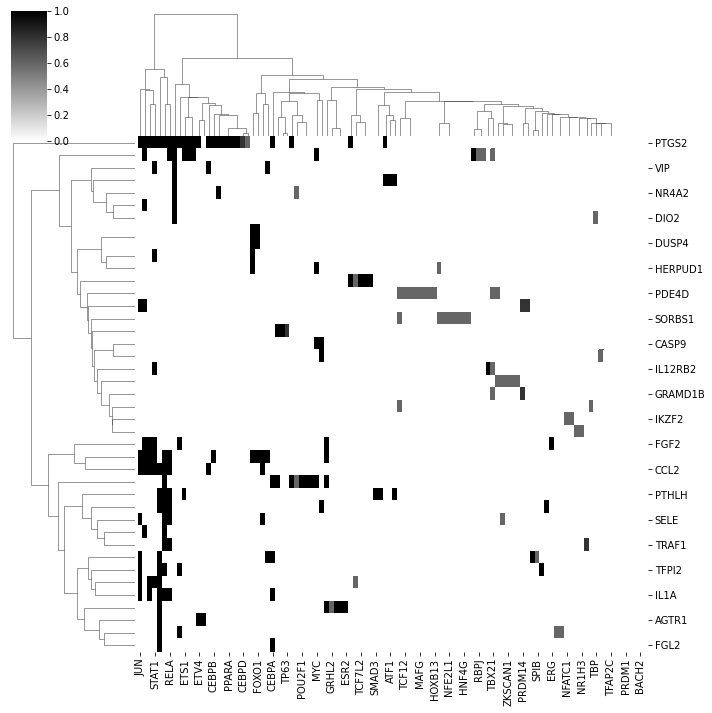

In [10]:
g = seaborn.clustermap(idfr, cmap='binary', method='ward', metric='euclidean')

In [12]:
idfr['FOXO1']


GRAMD1B    0.0
AREG       0.0
PDK4       1.0
CXCR4      0.0
NR4A3      0.0
NR4A2      0.0
DUSP4      1.0
SOCS2      0.0
CREM       0.0
TFPI2      0.0
ITGAX      0.0
DIO2       0.0
CGA        0.0
THBD       0.0
FGL2       0.0
AGTR1      0.0
CASP9      0.0
SORBS1     0.0
IKZF2      0.0
PTHLH      0.0
GPRC5A     0.0
KLF4       0.0
IL1B       1.0
SMOX       0.0
ABCG1      0.0
TGFA       0.0
HERPUD1    0.0
NTRK1      0.0
IL12RB2    0.0
PDE4D      0.0
VIP        0.0
PTGS2      0.0
SELE       0.0
SNAI2      0.0
TLR2       0.0
TRAF1      0.0
IL1A       0.0
FRMD6      0.0
FGF2       0.0
GADD45A    0.0
CCL2       0.0
Name: FOXO1, dtype: float64